Calculate the number of visits and coadded depth in all filters, and then generate a histogram with all filters.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
from lsst.sims.maf.metricBundles import MetricBundle, MetricBundleGroup, makeBundleDict

In [2]:
runName = 'enigma_1189'
opsdb = db.OpsimDatabase('sqlite:///enigma_1189_sqlite.db')
outDir = 'allfilters_test'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
m1 = metrics.CountMetric('expMJD', metricName='Nvisits')
m2 = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=64)
summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

In [5]:
nvisits = {}
coadd = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' %(f)
    nvisits[f] = MetricBundle(m1, slicer, sqlconstraint=sqlconstraint, runName=runName,
                             summaryMetrics=summaryMetrics)
    coadd[f] = MetricBundle(m2, slicer, sqlconstraint=sqlconstraint, runName=runName,
                           summaryMetrics=summaryMetrics)
    bdict = makeBundleDict([nvisits[f], coadd[f]])
    bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.writeAll()

Querying database with constraint filter = "u"
Found 186607 visits
Running:  ['enigma_1189_Nvisits_u_HEAL', 'enigma_1189_CoaddM5_u_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "g"
Found 249108 visits
Running:  ['enigma_1189_CoaddM5_g_HEAL', 'enigma_1189_Nvisits_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['enigma_1189_CoaddM5_r_HEAL', 'enigma_1189_Nvisits_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "i"
Found 545488 visits
Running:  ['enigma_1189_CoaddM5_i_HEAL', 'enigma_1189_Nvisits_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "z"
Found 497113 visits
Running:  ['e

In [6]:
!ls $outDir

enigma_1189_CoaddM5_g_Dithered_HEAL.npz enigma_1189_CoaddM5_u_HEAL.npz          enigma_1189_Nvisits_i_Dithered_HEAL.npz enigma_1189_Nvisits_y_HEAL.npz
enigma_1189_CoaddM5_g_HEAL.npz          enigma_1189_CoaddM5_y_Dithered_HEAL.npz enigma_1189_Nvisits_i_HEAL.npz          enigma_1189_Nvisits_z_Dithered_HEAL.npz
enigma_1189_CoaddM5_i_Dithered_HEAL.npz enigma_1189_CoaddM5_y_HEAL.npz          enigma_1189_Nvisits_r_Dithered_HEAL.npz enigma_1189_Nvisits_z_HEAL.npz
enigma_1189_CoaddM5_i_HEAL.npz          enigma_1189_CoaddM5_z_Dithered_HEAL.npz enigma_1189_Nvisits_r_HEAL.npz          resultsDb_sqlite.db
enigma_1189_CoaddM5_r_Dithered_HEAL.npz enigma_1189_CoaddM5_z_HEAL.npz          enigma_1189_Nvisits_u_Dithered_HEAL.npz
enigma_1189_CoaddM5_r_HEAL.npz          enigma_1189_Nvisits_g_Dithered_HEAL.npz enigma_1189_Nvisits_u_HEAL.npz
enigma_1189_CoaddM5_u_Dithered_HEAL.npz enigma_1189_Nvisits_g_HEAL.npz          enigma_1189_Nvisits_y_Dithered_HEAL.npz


In [6]:
print 'Nvisits --'
for f in filterlist:
    print nvisits[f].summaryValues
print 'Coadd --'
for f in filterlist:
    print coadd[f].summaryValues

Nvisits --
{'25th%ile': 62.0, 'Rms': 248.24502352933479, '75th%ile': 64.0, 'Min': 30.0, 'Max': 5563.0, 'Median': 63.0, 'Mean': 81.733751902587514}
{'25th%ile': 60.0, 'Rms': 90.483016059217988, '75th%ile': 90.0, 'Min': 30.0, 'Max': 2331.0, 'Median': 88.0, 'Mean': 91.84816922236152}
{'25th%ile': 92.0, 'Rms': 192.03189557237977, '75th%ile': 205.0, 'Min': 30.0, 'Max': 4739.0, 'Median': 200.0, 'Mean': 200.74209409949864}
{'25th%ile': 92.0, 'Rms': 192.42365476827487, '75th%ile': 206.0, 'Min': 30.0, 'Max': 4746.0, 'Median': 200.0, 'Mean': 201.02162874405451}
{'25th%ile': 80.0, 'Rms': 222.23648923718289, '75th%ile': 184.0, 'Min': 30.0, 'Max': 5733.0, 'Median': 182.0, 'Mean': 183.25572052963105}
{'25th%ile': 177.0, 'Rms': 188.1036315286421, '75th%ile': 183.0, 'Min': 30.0, 'Max': 4267.0, 'Median': 181.0, 'Mean': 194.83660578386605}
Coadd --
{'25th%ile': 26.060606690193758, 'Rms': 0.44563101987966264, '75th%ile': 26.219333829710511, 'Min': 24.333663574714429, 'Max': 28.58189623576245, 'Median': 2

Now let's try to combine the histograms.

In [8]:
filtercolors = {'u':'b', 'g':'g', 'r':'y', 'i':'r', 'z':'m', 'y':'k'}
for f in filterlist:
    plotDict = {'color':filtercolors[f]}
    plotDict.update({'xMin':0, 'xMax':300, 'colorMin':0, 'colorMax':300, 'binsize':5, 
                     'label':'%s  %1.f/%.1f/%1.f' %(f, nvisits[f].summaryValues['25th%ile'], 
                                                    nvisits[f].summaryValues['Median'], 
                                                   nvisits[f].summaryValues['75th%ile'])})
    nvisits[f].setPlotDict(plotDict)
    plotDict.update({'xMin':23.8, 'xMax':29.8, 'colorMin':24, 'colorMax':28, 'binsize':0.02,
                    'label':'%s %.2f/%.2f/%.2f' %(f, coadd[f].summaryValues['25th%ile'],
                                                 coadd[f].summaryValues['Median'],
                                                 coadd[f].summaryValues['75th%ile'])})
    coadd[f].setPlotDict(plotDict)

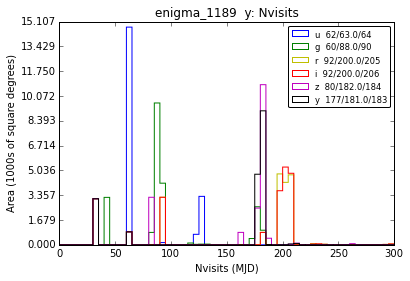

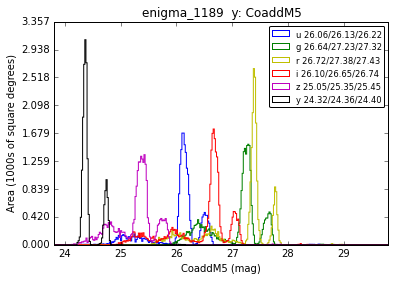

In [9]:
fig = None
for f in filterlist:
    fig = nvisits[f].slicer.plotHistogram(nvisits[f].metricValues, fignum=fig, **nvisits[f].plotDict)
    plt.fig = fig
    plt.legend(loc='upper right', fontsize='small', numpoints=1, fancybox=True)
fig = None
for f in filterlist:
    fig = coadd[f].slicer.plotHistogram(coadd[f].metricValues, fignum=fig, **coadd[f].plotDict)
    plt.fig = fig
    plt.legend(loc='upper right', fontsize='small', numpoints=1, fancybox=True)

In [10]:
m1 = metrics.CountMetric('expMJD', metricName='Nvisits')
m2 = metrics.Coaddm5Metric()
slicer = slicers.HealpixSlicer(nside=64, lonCol='ditheredRA', latCol='ditheredDec')

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [11]:
nvisitsDith = {}
coaddDith = {}
for f in filterlist:
    sqlconstraint = 'filter = "%s"' %(f)
    nvisitsDith[f] = MetricBundle(m1, slicer, sqlconstraint=sqlconstraint, runName=runName,
                             metadata = '%s Dithered' %(f), summaryMetrics=summaryMetrics)
    coaddDith[f] = MetricBundle(m2, slicer, sqlconstraint=sqlconstraint, runName=runName,
                           metadata = '%s Dithered' %(f), summaryMetrics=summaryMetrics)
    bdict = makeBundleDict([nvisitsDith[f], coaddDith[f]])
    bgroup = MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.writeAll()

Querying database with constraint filter = "u"
Found 186607 visits
Running:  ['enigma_1189_Nvisits_u_Dithered_HEAL', 'enigma_1189_CoaddM5_u_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "g"
Found 249108 visits
Running:  ['enigma_1189_CoaddM5_g_Dithered_HEAL', 'enigma_1189_Nvisits_g_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r"
Found 544710 visits
Running:  ['enigma_1189_CoaddM5_r_Dithered_HEAL', 'enigma_1189_Nvisits_r_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "i"
Found 545488 visits
Running:  ['enigma_1189_CoaddM5_i_Dithered_HEAL', 'enigma_1189_Nvisits_i_Dithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying

In [12]:
print 'Nvisits Dithered --'
for f in filterlist:
    print nvisitsDith[f].summaryValues
print 'Coadd Dithered --'
for f in filterlist:
    print coaddDith[f].summaryValues

Nvisits Dithered --
{'25th%ile': 68.0, 'Rms': 165.43530177641296, '75th%ile': 80.0, 'Min': 1.0, 'Max': 4984.0, 'Median': 76.0, 'Mean': 78.982093409636335}
{'25th%ile': 50.0, 'Rms': 62.823169251204654, '75th%ile': 112.0, 'Min': 1.0, 'Max': 1930.0, 'Median': 104.0, 'Mean': 89.777868594781509}
{'25th%ile': 113.0, 'Rms': 136.37195198073741, '75th%ile': 252.0, 'Min': 1.0, 'Max': 3849.0, 'Median': 238.0, 'Mean': 195.53155043372061}
{'25th%ile': 113.0, 'Rms': 136.84158098508115, '75th%ile': 252.0, 'Min': 1.0, 'Max': 3890.0, 'Median': 239.0, 'Mean': 195.63567807747668}
{'25th%ile': 98.0, 'Rms': 154.96081305595251, '75th%ile': 227.0, 'Min': 1.0, 'Max': 4740.0, 'Median': 214.0, 'Mean': 178.41958523902011}
{'25th%ile': 194.0, 'Rms': 130.86980951348352, '75th%ile': 227.0, 'Min': 1.0, 'Max': 3513.0, 'Median': 217.0, 'Mean': 188.82608053740819}
Coadd Dithered --
{'25th%ile': 26.102090219818979, 'Rms': 0.47758600379362787, '75th%ile': 26.285943468674727, 'Min': 22.617484999999999, 'Max': 28.513952997

In [13]:
for f in filterlist:
    plotDict = {'color':'k'}
    plotDict.update({'xMin':None, 'xMax':None, 'colorMin':0, 'colorMax':300, 'binsize':5, 
                     'label':'%s dithered %1.f/%.1f/%1.f' %(f, nvisitsDith[f].summaryValues['25th%ile'], 
                                                    nvisitsDith[f].summaryValues['Median'], 
                                                   nvisitsDith[f].summaryValues['75th%ile'])})
    nvisitsDith[f].setPlotDict(plotDict)
    plotDict.update({'xMin':None, 'xMax':None, 'colorMin':24, 'colorMax':28, 'binsize':0.02,
                    'label':'%s dithered %.2f/%.2f/%.2f' %(f, coaddDith[f].summaryValues['25th%ile'],
                                                 coaddDith[f].summaryValues['Median'],
                                                 coaddDith[f].summaryValues['75th%ile'])})
    coaddDith[f].setPlotDict(plotDict)

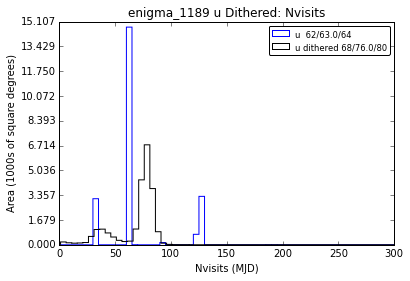

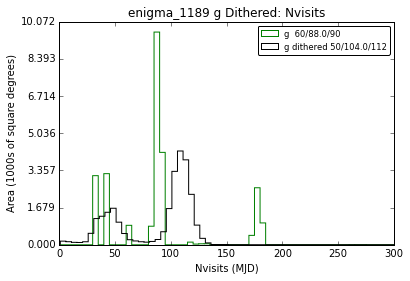

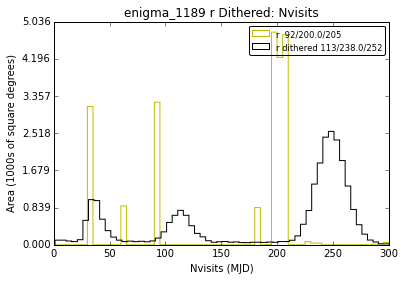

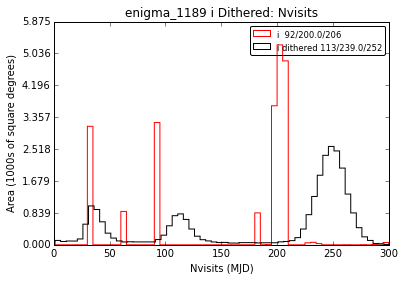

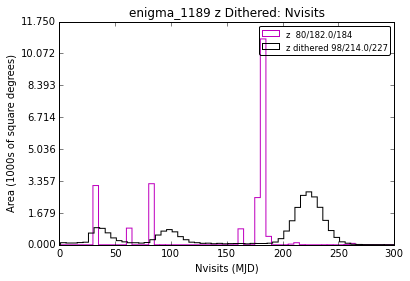

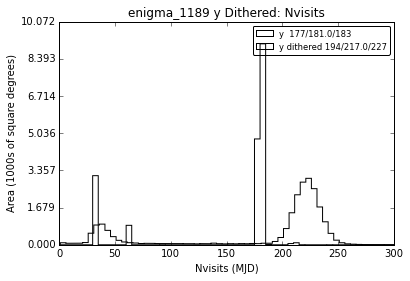

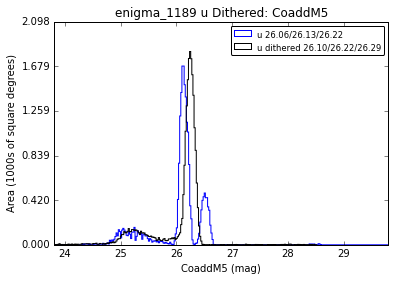

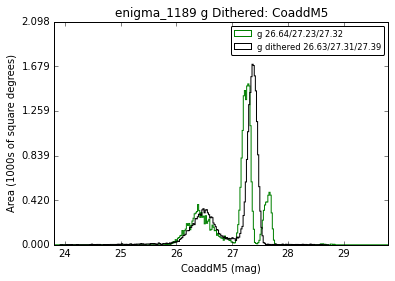

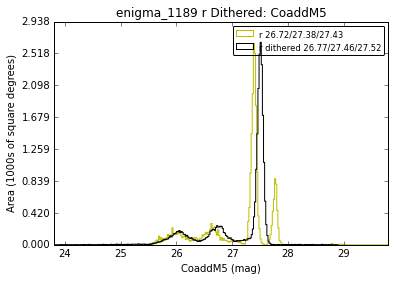

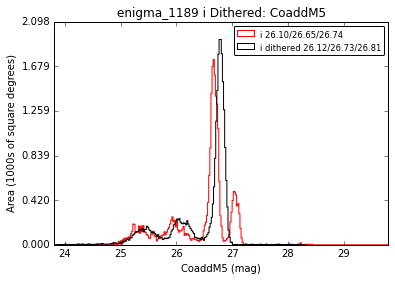

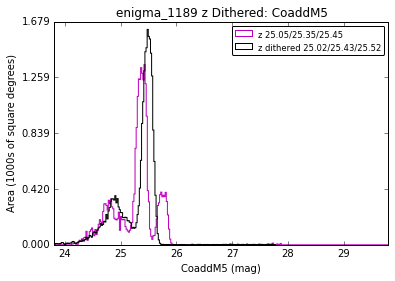

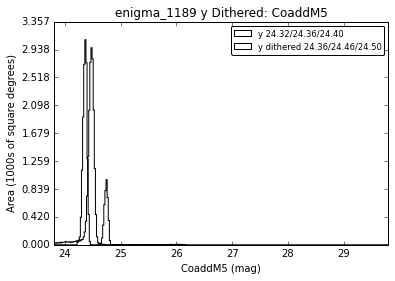

In [14]:
for f in filterlist:
    fig = None
    fig = nvisits[f].slicer.plotHistogram(nvisits[f].metricValues, fignum=fig, **nvisits[f].plotDict)
    fig = nvisitsDith[f].slicer.plotHistogram(nvisitsDith[f].metricValues, fignum=fig, **nvisitsDith[f].plotDict)
    plt.fig = fig
    plt.legend(loc='upper right', fontsize='small', numpoints=1, fancybox=True)
for f in filterlist:
    fig = None
    fig = coadd[f].slicer.plotHistogram(coadd[f].metricValues, fignum=fig, **coadd[f].plotDict)
    fig = coaddDith[f].slicer.plotHistogram(coaddDith[f].metricValues, fignum=fig, **coaddDith[f].plotDict)
    plt.fig = fig
    plt.legend(loc='upper right', fontsize='small', numpoints=1, fancybox=True)

In [15]:
for f in filterlist:
    plotDict = {'color':filtercolors[f]}
    plotDict.update({'xMin':0, 'xMax':300, 'colorMin':0, 'colorMax':300, 'binsize':5, 
                     'label':'%s dithered %1.f/%.1f/%1.f' %(f, nvisitsDith[f].summaryValues['25th%ile'], 
                                                    nvisitsDith[f].summaryValues['Median'], 
                                                   nvisitsDith[f].summaryValues['75th%ile'])})
    nvisitsDith[f].setPlotDict(plotDict)
    plotDict.update({'xMin':24, 'xMax':28.5, 'colorMin':24, 'colorMax':28, 'binsize':0.02,
                    'label':'%s dithered %.2f/%.2f/%.2f' %(f, coaddDith[f].summaryValues['25th%ile'],
                                                 coaddDith[f].summaryValues['Median'],
                                                 coaddDith[f].summaryValues['75th%ile'])})
    coaddDith[f].setPlotDict(plotDict)

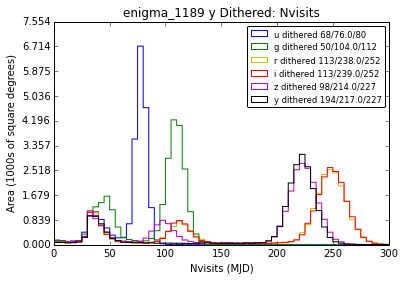

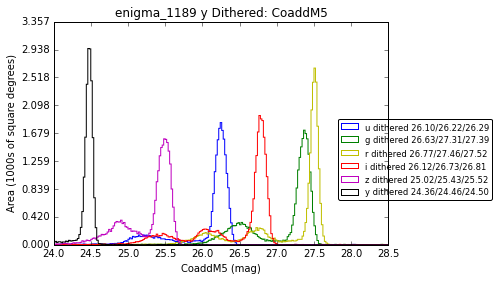

In [16]:
fig = None
for f in filterlist:
    fig = nvisitsDith[f].slicer.plotHistogram(nvisitsDith[f].metricValues, fignum=fig, **nvisitsDith[f].plotDict)
    plt.fig = fig
    plt.legend(loc='upper right', fontsize='small', numpoints=1, fancybox=True)
fig = None
for f in filterlist:
    fig = coaddDith[f].slicer.plotHistogram(coaddDith[f].metricValues, fignum=fig, **coaddDith[f].plotDict)
    plt.fig = fig
    plt.legend(loc=(0.85, 0.2), fontsize='small', numpoints=1, fancybox=True)
    # How to save the figure and save reference in resultsDb?